### NY 20 Day Prediction Model
- Filtered data to include dates September to December to reduce number of 0 values
- NY is a larger dataset
- Larger population
- Higher number of reported cases

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import style
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
covid = pd.read_csv("covid-states.csv")
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [3]:
covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [4]:
# Cut the data by date - start date September end date December
start_date = '2020-09-01'
end_date = '2020-12-02'
mask = (covid['date'] > start_date) & (covid['date'] <= end_date)
covid  = covid.loc[mask]
covid

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,2020-09-02,VT,B,58.0,58.0,0,NaN,NaN,NaN,2.0,...,189683.0,1148,NaN,NaN,NaN,NaN,139603.0,1754,189683.0,1148
5148,2020-09-02,WA,B,1931.0,1931.0,16,NaN,6787.0,6787.0,328.0,...,1480039.0,6794,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5149,2020-09-02,WI,A+,1150.0,1142.0,11,8.0,5916.0,5916.0,287.0,...,1770546.0,17412,NaN,NaN,NaN,NaN,1268677.0,8376,NaN,0
5150,2020-09-02,WV,C,230.0,228.0,8,2.0,NaN,NaN,146.0,...,441585.0,3144,16019.0,NaN,NaN,NaN,NaN,0,441396.0,3141


In [5]:
#Data Analysis for NY
ny_data = covid[covid["state"]=="NY"]
ny_data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
37,2020-12-02,NY,B,26889.0,NaN,73,NaN,89995.0,89995.0,3924.0,...,19761724.0,193551,NaN,NaN,NaN,NaN,NaN,0,NaN,0
93,2020-12-01,NY,B,26816.0,NaN,69,NaN,89995.0,89995.0,3774.0,...,19568173.0,146675,NaN,NaN,NaN,NaN,NaN,0,NaN,0
149,2020-11-30,NY,B,26747.0,NaN,57,NaN,89995.0,89995.0,3532.0,...,19421498.0,148974,NaN,NaN,NaN,NaN,NaN,0,NaN,0
205,2020-11-29,NY,B,26690.0,NaN,58,NaN,89995.0,89995.0,3372.0,...,19272524.0,157320,NaN,NaN,NaN,NaN,NaN,0,NaN,0
261,2020-11-28,NY,B,26632.0,NaN,44,NaN,89995.0,89995.0,3287.0,...,19115204.0,152355,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [6]:
ny_data = ny_data.sort_values(by = 'date', ascending = True)
ny_data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
5133,2020-09-02,NY,A,25336.0,NaN,5,NaN,89995.0,89995.0,445.0,...,8428477.0,88447,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5077,2020-09-03,NY,A,25343.0,NaN,7,NaN,89995.0,89995.0,430.0,...,8517458.0,88981,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5021,2020-09-04,NY,A,25348.0,NaN,5,NaN,89995.0,89995.0,428.0,...,8610853.0,93395,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4965,2020-09-05,NY,A,25350.0,NaN,2,NaN,89995.0,89995.0,425.0,...,8710614.0,99761,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4909,2020-09-06,NY,A,25359.0,NaN,9,NaN,89995.0,89995.0,410.0,...,8796244.0,85630,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [7]:
ny_data = ny_data.fillna(0)
ny_data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
5133,2020-09-02,NY,A,25336.0,0.0,5,0.0,89995.0,89995.0,445.0,...,8428477.0,88447,0.0,0.0,0.0,0.0,0.0,0,0.0,0
5077,2020-09-03,NY,A,25343.0,0.0,7,0.0,89995.0,89995.0,430.0,...,8517458.0,88981,0.0,0.0,0.0,0.0,0.0,0,0.0,0
5021,2020-09-04,NY,A,25348.0,0.0,5,0.0,89995.0,89995.0,428.0,...,8610853.0,93395,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4965,2020-09-05,NY,A,25350.0,0.0,2,0.0,89995.0,89995.0,425.0,...,8710614.0,99761,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4909,2020-09-06,NY,A,25359.0,0.0,9,0.0,89995.0,89995.0,410.0,...,8796244.0,85630,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [8]:
ny = ny_data.set_index('date')
ny

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-09-02,NY,A,25336.0,0.0,5,0.0,89995.0,89995.0,445.0,0,...,8428477.0,88447,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-09-03,NY,A,25343.0,0.0,7,0.0,89995.0,89995.0,430.0,0,...,8517458.0,88981,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-09-04,NY,A,25348.0,0.0,5,0.0,89995.0,89995.0,428.0,0,...,8610853.0,93395,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-09-05,NY,A,25350.0,0.0,2,0.0,89995.0,89995.0,425.0,0,...,8710614.0,99761,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-09-06,NY,A,25359.0,0.0,9,0.0,89995.0,89995.0,410.0,0,...,8796244.0,85630,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,NY,B,26632.0,0.0,44,0.0,89995.0,89995.0,3287.0,0,...,19115204.0,152355,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-11-29,NY,B,26690.0,0.0,58,0.0,89995.0,89995.0,3372.0,0,...,19272524.0,157320,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2020-11-30,NY,B,26747.0,0.0,57,0.0,89995.0,89995.0,3532.0,0,...,19421498.0,148974,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [9]:
#Drop columns
ny_data.drop(['state', 'dataQualityGrade', 'deathConfirmed',\
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative',\
       'hospitalizedIncrease', 'inIcuCumulative', 'negative',\
       'negativeIncrease', 'negativeTestsAntibody',\
       'negativeTestsPeopleAntibody', 'negativeTestsViral',\
       'onVentilatorCumulative',\
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',\
       'positiveTestsAntibody', 'positiveTestsAntigen',\
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',\
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',\
       'totalTestEncountersViralIncrease', 'totalTestResults',\
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',\
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',\
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',\
       'totalTestsViral', 'totalTestsViralIncrease'],1,inplace = True)

In [10]:
ny_data.head()

,date,death,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,positive
5133,2020-09-02,25336.0,445.0,117.0,61.0,436218.0
5077,2020-09-03,25343.0,430.0,117.0,61.0,437107.0
5021,2020-09-04,25348.0,428.0,116.0,61.0,437971.0
4965,2020-09-05,25350.0,425.0,115.0,61.0,438772.0
4909,2020-09-06,25359.0,410.0,119.0,56.0,439501.0


In [11]:
# Specified data columns
X = ny_data[['positive','hospitalizedCurrently','inIcuCurrently']]
y = ny_data['onVentilatorCurrently']

# weighting takes into account the most recent data
wt=[1/y.shape[0]*i for i in range(y.shape[0])]

<AxesSubplot:xlabel='date', ylabel='onVentilatorCurrently'>

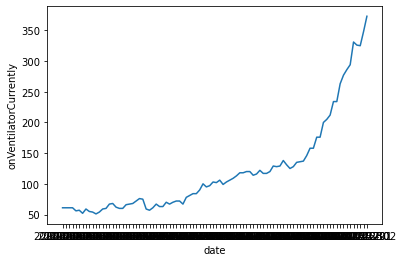

In [12]:
sns.lineplot(x='date',y='onVentilatorCurrently',data=ny_data)

<AxesSubplot:xlabel='date', ylabel='hospitalizedCurrently'>

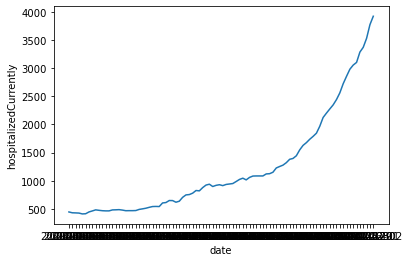

In [13]:
sns.lineplot(x='date',y='hospitalizedCurrently',data=ny_data)

In [14]:
ny_data.set_index('date', inplace =True)


In [15]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = ny_data[['positive','hospitalizedCurrently','inIcuCurrently']]
y = ny_data['onVentilatorCurrently'].values.reshape(-1,1)# Specified data columns

In [16]:
print(X.shape, y.shape)

(92, 3) (92, 1)


## Scale the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X)
Xsc = scaler.transform(X)

In [19]:
#Xsc

## Model1 -On Ventilator Currently

In [20]:
#number of 20 days forecast - split test data into the future and training data into past
n_days = 20
X_train = Xsc[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = Xsc[-n_days:,:]
y_test = y[-n_days:,:]

In [21]:
#X_train

In [22]:
model = LinearRegression()
model

LinearRegression()

In [23]:
model.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [24]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [25]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9430089776034141
Testing Data Score: 0.9359531931318289


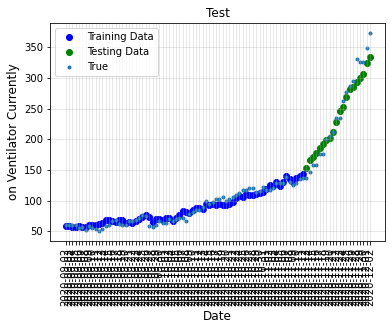

In [26]:
x = ny_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

#plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [15, 9]

plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.xticks(rotation=90)
plt.ylabel('on Ventilator Currently', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.title("Test")
plt.show()

In [27]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[-2.5513687   9.59553283 64.27685297]]
y-axis intercept: [120.4480185]


## Model -Hospitalized

In [28]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = ny_data[['positive','inIcuCurrently','onVentilatorCurrently']]
y = ny_data['hospitalizedCurrently'].values.reshape(-1,1)# Specified data columns

In [29]:
print(X.shape, y.shape)

(92, 3) (92, 1)


In [30]:
scaler = StandardScaler()
scaler.fit(X)
Xsc1 = scaler.transform(X)

In [31]:
#Xsc1

In [32]:
#number of 20 days forecast - split test data into the future and training data into past
n_days = 20
X_train = Xsc[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = Xsc1[-n_days:,:]
y_test = y[-n_days:,:]

In [33]:
model1 = LinearRegression()
model1

LinearRegression()

In [34]:
model1.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [35]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [36]:
print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9811377506375275


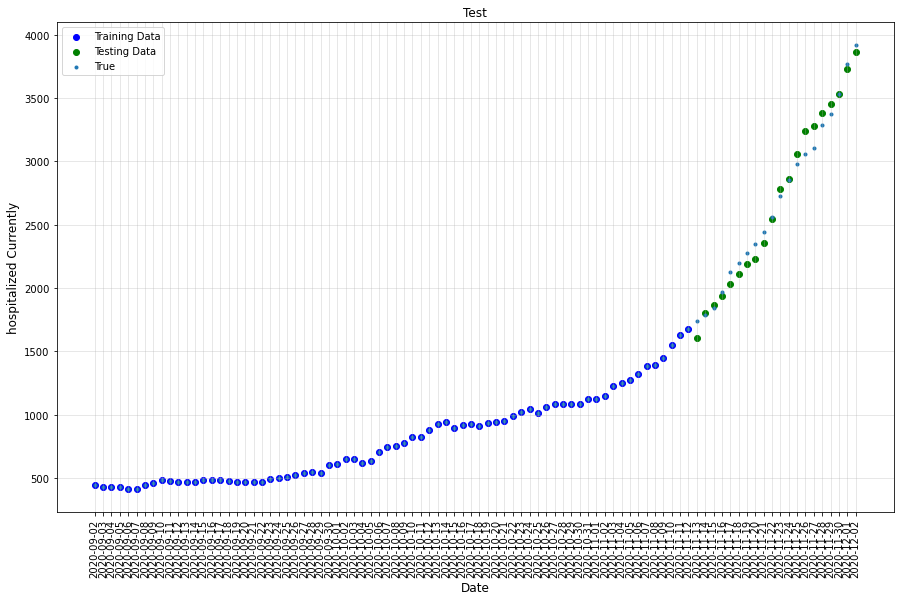

In [37]:
x = ny_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

#plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [15, 8]

plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.xticks(rotation=90)
plt.ylabel('hospitalized Currently', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.title("Test")
plt.show()

In [38]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[-2.5513687   9.59553283 64.27685297]]
y-axis intercept: [120.4480185]


## Model2 - In ICU Currently

In [39]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = ny_data[['positive','onVentilatorCurrently','hospitalizedCurrently']]
y = ny_data['inIcuCurrently'].values.reshape(-1,1)# Specified data columns

In [40]:
print(X.shape, y.shape)

(92, 3) (92, 1)


In [41]:
scaler = StandardScaler()
scaler.fit(X)
Xsc2 = scaler.transform(X)

In [42]:
#number of 20 days forecast - split test data into the future and training data into past
n_days = 20
X_train = Xsc2[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = Xsc2[-n_days:,:]
y_test = y[-n_days:,:]

In [43]:
model2 = LinearRegression()
model2

LinearRegression()

In [44]:
model2.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [45]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [46]:
print(f"Training Data Score: {model2.score(X_train, y_train)}")
print(f"Testing Data Score: {model2.score(X_test, y_test)}")

Training Data Score: 0.9776264973192664
Testing Data Score: 0.530388046108709


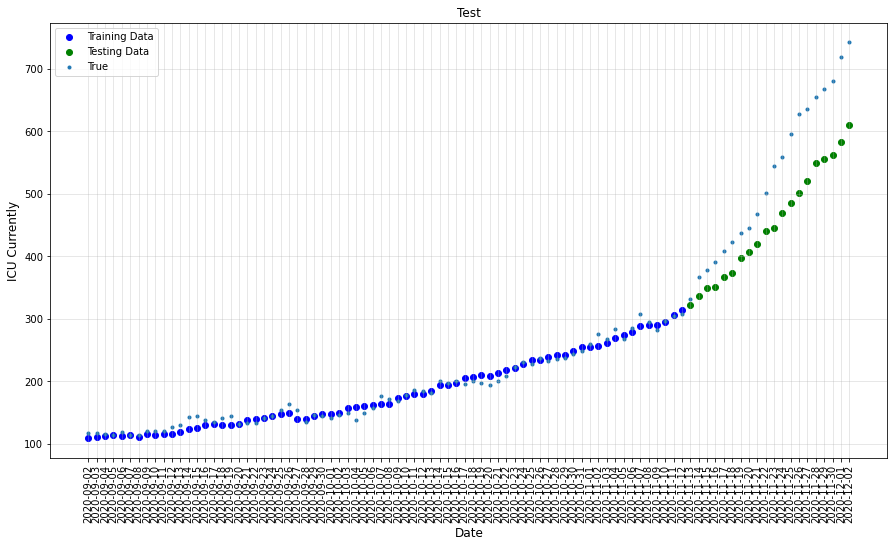

In [47]:
x = ny_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

#plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [15, 8]

plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.xticks(rotation=90)
plt.ylabel('ICU Currently', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.title("Test")
plt.show()

In [48]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[-2.5513687   9.59553283 64.27685297]]
y-axis intercept: [120.4480185]


## Model 3 - Death

In [49]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = ny_data[['positive','onVentilatorCurrently','hospitalizedCurrently','inIcuCurrently']]
y = ny_data['death'].values.reshape(-1,1)# Specified data columns

In [50]:
print(X.shape, y.shape)

(92, 4) (92, 1)


In [51]:
scaler = StandardScaler()
scaler.fit(X)
# X Scaler
Xsc3 = scaler.transform(X)

In [52]:
#number of 20 days forecast - split test data into the future and training data into past
n_days = 20
X_train = Xsc3[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = Xsc3[-n_days:,:]
y_test = y[-n_days:,:]

In [53]:
model3 = LinearRegression()
model3

LinearRegression()

In [54]:
model3.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [55]:
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

In [56]:
print(f"Training Data Score: {model3.score(X_train, y_train)}")
print(f"Testing Data Score: {model3.score(X_test, y_test)}")

Training Data Score: 0.9991201311188204
Testing Data Score: 0.9875034566515777


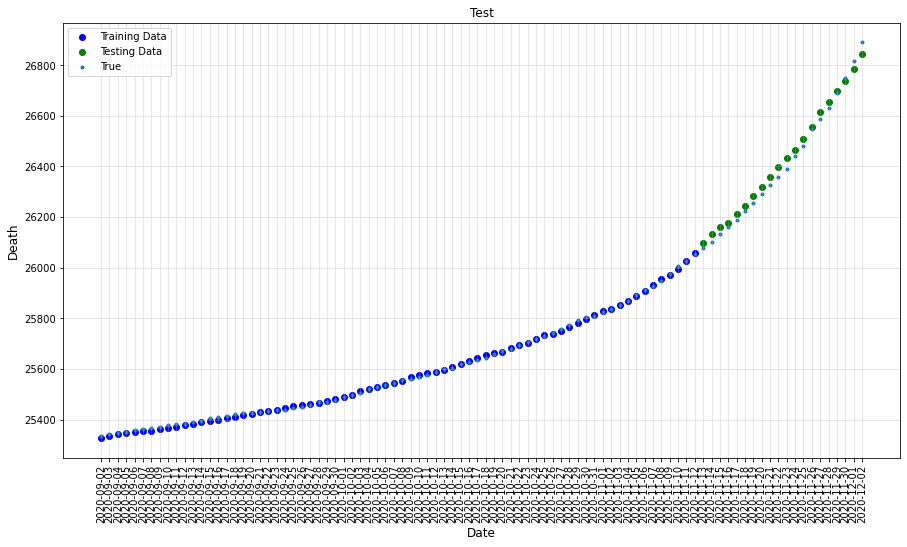

In [57]:
x = ny_data.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

#plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [15, 8]

plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.xticks(rotation=90)
plt.ylabel('Death', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.title("Test")
plt.show()

In [58]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[-2.5513687   9.59553283 64.27685297]]
y-axis intercept: [120.4480185]


## Death

In [59]:
df = ny_data.reset_index()[['date','death']].sort_values('date')
df.head()

,date,death
0,2020-09-02,25336.0
1,2020-09-03,25343.0
2,2020-09-04,25348.0
3,2020-09-05,25350.0
4,2020-09-06,25359.0


In [60]:
df.date = df.date.map(lambda x : dt.datetime.strptime(x,'%Y-%m-%d'))

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
#X = df.date
#y = df.death

In [63]:
X = df['date'].values.reshape(-1,1)
y = df['death'].values.reshape(-1,1)

In [64]:
#df.date.reshape(-1,1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [66]:
print(X_train.shape, y_train.shape)

(73, 1) (73, 1)


In [67]:
model4 = LinearRegression()

In [68]:
model4.fit(X_train, y_train)

LinearRegression()

In [69]:
#y_pred_train = model4.predict(X_train)
#y_pred_test = model4.predict(X_test)

In [70]:
#print(f"Training Data Score: {model4.score(X_train, y_train)}")
#print(f"Testing Data Score: {model4.score(X_test, y_test)}")

In [71]:
#X_test

In [72]:
#y_pred_train = model4.predict(X_train)
#y_pred_test = model4.predict(X_test)